# Tesla Stock Price vs. Elon Musk's Tweet LikeCount

This notebook visualizes the relationship between Tesla's daily closing stock price and the total likeCount of Elon Musk's tweets per day.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

current_dir = os.getcwd()
clean_data_dir = os.path.join(current_dir,'..' ,'Data', 'clean')


# Load Tesla stock data
stock = pd.read_csv(f'{clean_data_dir}/clean_tesla_stock.csv', parse_dates=['Date'])
# Load Musk tweets data
tweets = pd.read_csv(f'{clean_data_dir}/clean_musk_tweets.csv', parse_dates=['timestamp'])

stock.head(), tweets.head()

(        Date      Open      High       Low     Close       Volume
 0 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500.0
 1 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000.0
 2 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000.0
 3 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500.0
 4 2010-07-07  1.093333  1.108667  0.998667  1.053333  103825500.0,
                                                 text  retweetCount  \
 0  Please ignore prior tweets, as that was someon...         697.0   
 1  Went to Iceland on Sat to ride bumper cars on ...          27.0   
 2  I made the volume on the Model S http://t.co/w...          19.0   
 3  Great Voltaire quote, arguably better than Twa...          36.0   
 4                  That was a total non sequitur btw          12.0   
 
    replyCount  likeCount  quoteCount  viewCount                 timestamp  \
 0      1422.0     6392.0       400.0        NaN 2010-06-04 18:31:57+00:00   
 1        40.

## Prepare and Aggregate Data
- Aggregate tweets by day, summing likeCount.
- Merge with Tesla's daily closing price.
    

In [7]:
# Aggregate tweets by day
tweets['date'] = tweets['timestamp'].dt.date
daily_likes = tweets.groupby('date')['likeCount'].sum().reset_index()
daily_likes['date'] = pd.to_datetime(daily_likes['date'])

# Prepare stock data
stock['Date'] = pd.to_datetime(stock['Date'])

# Merge on date
merged = pd.merge(stock, daily_likes, left_on='Date', right_on='date', how='left')
merged['likeCount'] = merged['likeCount'].fillna(0)

merged[['Date', 'Close', 'likeCount']].head()

,Date,Close,likeCount
0,2010-06-30,1.588667,0.0
1,2010-07-01,1.464000,0.0
2,2010-07-02,1.280000,0.0
3,2010-07-06,1.074000,0.0
4,2010-07-07,1.053333,0.0


## Visualize: TSLA Close Price and Musk Tweet LikeCount (Daily)


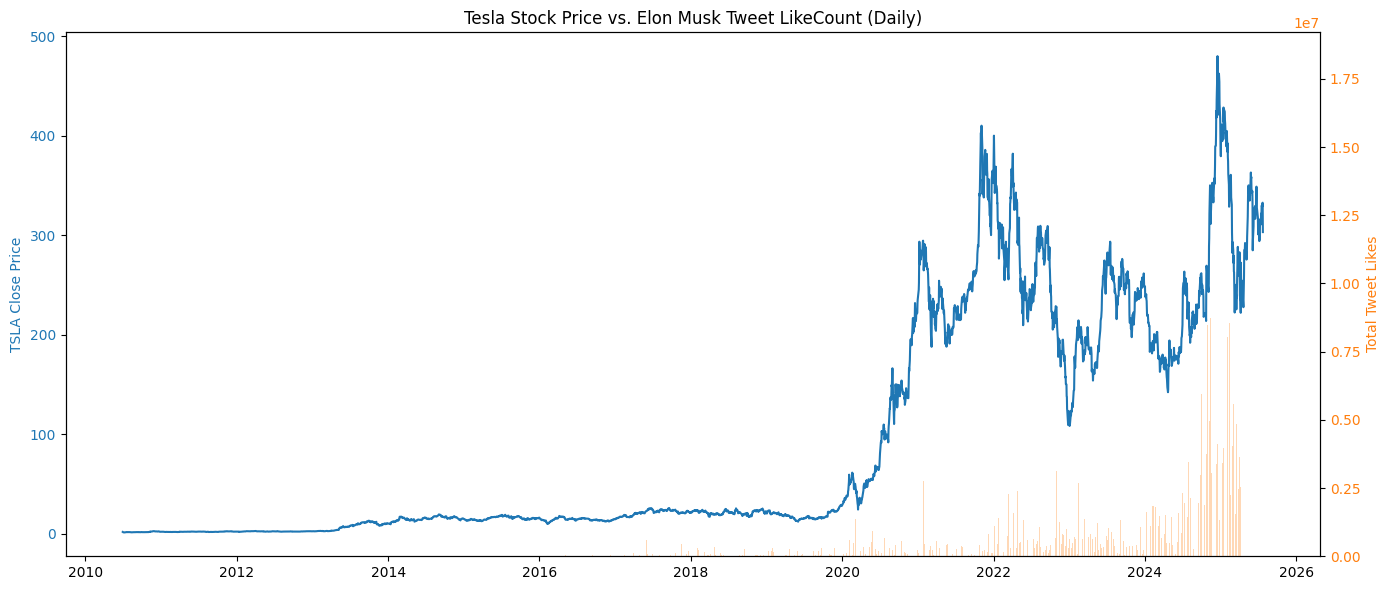

In [8]:
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(merged['Date'], merged['Close'], color='tab:blue', label='TSLA Close Price')
ax1.set_ylabel('TSLA Close Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.bar(merged['Date'], merged['likeCount'], color='tab:orange', alpha=0.3, label='Total Tweet Likes')
ax2.set_ylabel('Total Tweet Likes', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Tesla Stock Price vs. Elon Musk Tweet LikeCount (Daily)")
fig.tight_layout()
plt.show()

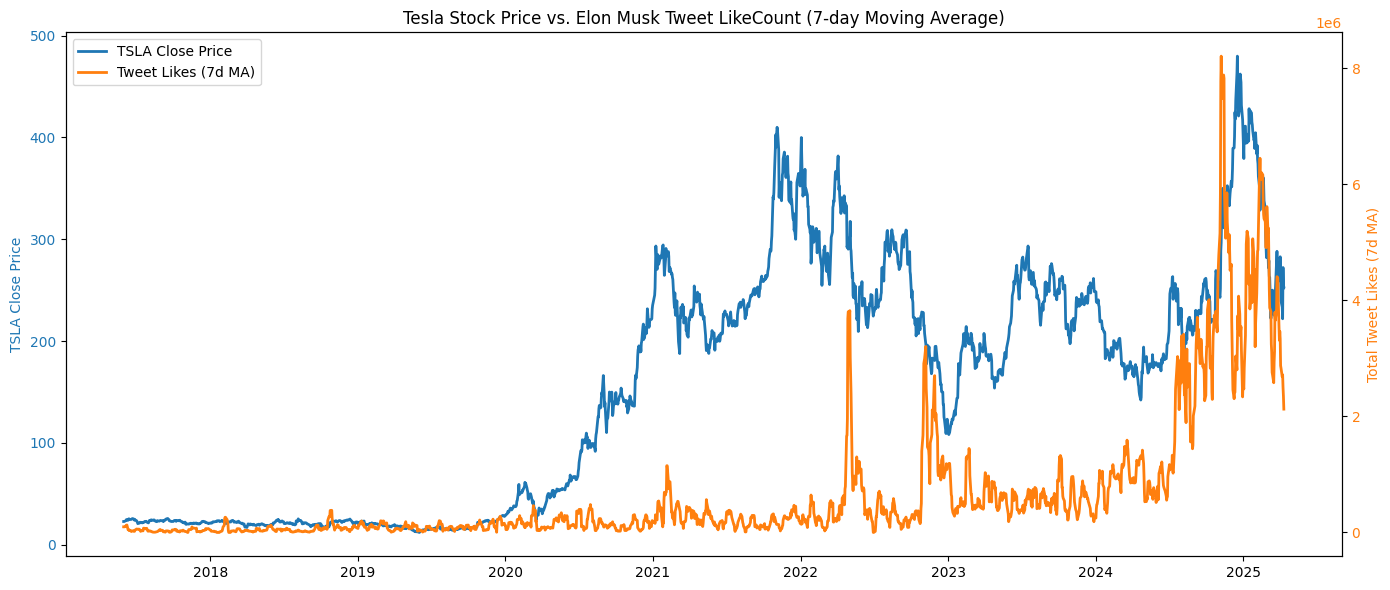

In [21]:
# Filter to period where tweet activity is nonzero
start_date = merged[merged['likeCount_MA7'] > 40000]['Date'].min()
last_tweet_date = tweets['timestamp'].dt.date.max()
filtered = merged[
    (merged['Date'] >= start_date) & (merged['Date'] <= pd.to_datetime(last_tweet_date))
]

fig, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(filtered['Date'], filtered['Close'], color='tab:blue', label='TSLA Close Price', linewidth=2)
ax1.set_ylabel('TSLA Close Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.plot(filtered['Date'], filtered['likeCount_MA7'], color='tab:orange', label='Tweet Likes (7d MA)', linewidth=2)
ax2.set_ylabel('Total Tweet Likes (7d MA)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')


# Add legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("Tesla Stock Price vs. Elon Musk Tweet LikeCount (7-day Moving Average)")
plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()

In [10]:
# Calculate daily price change
merged['price_change'] = merged['Close'].diff()
correlation = merged[['likeCount', 'price_change']].corr().iloc[0,1]
print(f"Correlation between daily tweet likeCount and TSLA price change: {correlation:.3f}")

Correlation between daily tweet likeCount and TSLA price change: -0.021


# Some More

